# Purpose of Program
Before we start building our ML model, we need a way of identifying the facial landmarks of the person speaking. We will do so using the Mediapipe module available to us from Google. Given an image as an input, the model outputs an estimate of 478 3-dimensional face landmarks.

The goal of this program is to try out the Mediapipe module

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


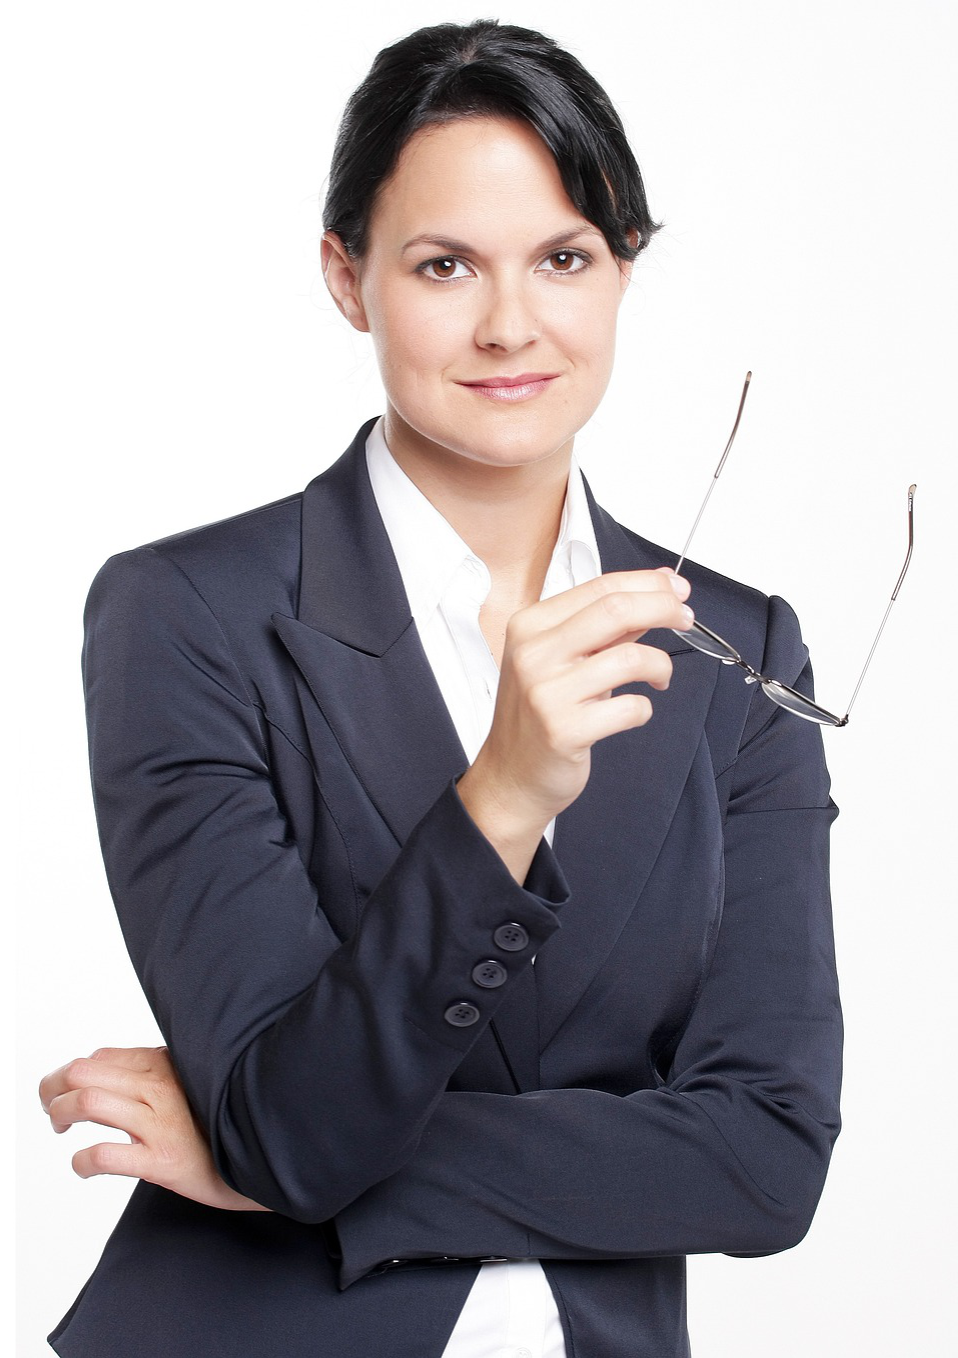

In [1]:
# Download an image of a person
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

# Install releveant Modules
!pip3 install mediapipe
import cv2
from google.colab.patches import cv2_imshow

# Display the image
img = cv2.imread("image.png")
cv2_imshow(img)

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


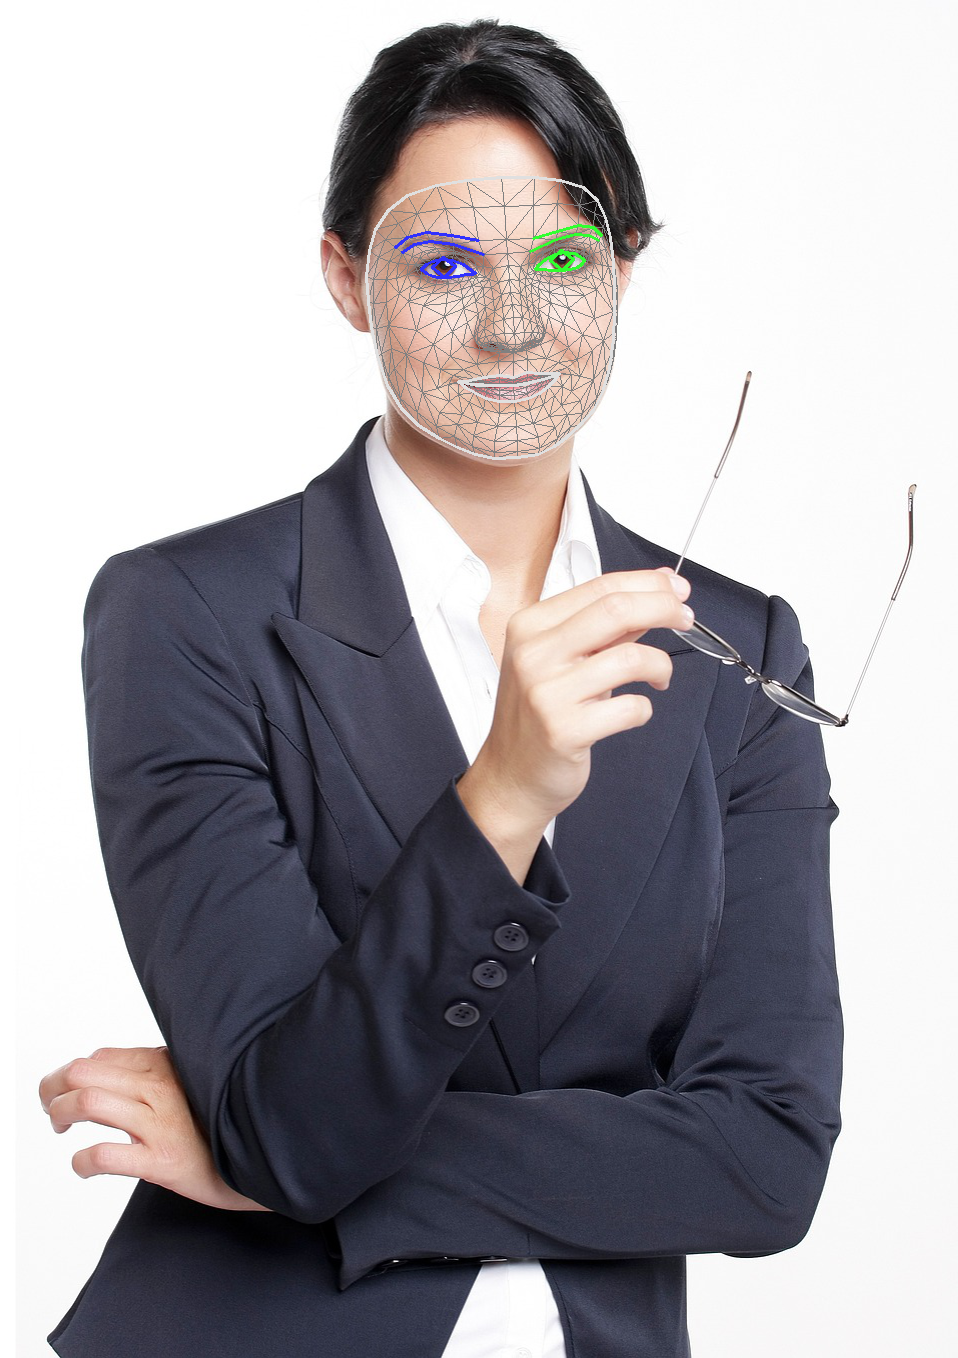

In [4]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='/content/drive/MyDrive/Deception_Detection/Code/face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.png")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

# Interpreting the Results
The face landmark detection results is represented by an object called FaceLandmarkerResult. To learn more about the FaceLandmarkerResult object, click on the link below:<br>

https://developers.google.com/mediapipe/api/solutions/java/com/google/mediapipe/tasks/vision/facelandmarker/FaceLandmarkerResult#FaceLandmarkerResult()<br>

We need to convert this object into a 478x2 numpy array (478 landmarks, 2 coordinates for each dimension xy). The X-Y coordinates are the screen coordinates, normalized to 0-1 (which is quite helpful). z represents the landmark depth, and the smaller the value the closer the world landmark is to the camera. For our purposes, we will only need the x and y coordinates.

<br>




In [5]:
# Given a FaceLandmarkerResult
def normalized_landmarks_to_np_array(FaceLandmarkerResult):
    normalized_landmarks = FaceLandmarkerResult.face_landmarks[0]
    #478 Landmarks, xyz coordinates
    landmarks_array = np.zeros((478, 2))  # Initialize array to hold x, y, z coordinates

    for i, landmark in enumerate(normalized_landmarks):
        landmarks_array[i] = [landmark.x, landmark.y]

    return landmarks_array


In [9]:
array = normalized_landmarks_to_np_array(detection_result)
print(array.shape)

(478, 2)


# Additional Challenge
As an additional quest out of curiousity, we want to find out whether

In [ ]:
pairs =[(386, 159), (388, 161), (385, 158), (249, 7), (263, 33), (382, 155), (374, 145), (384, 157), (398, 173), (390, 163), (381, 154), (387, 160), (380, 153), (466, 246), (373, 144), (362, 133)]

In [ ]:
from statistics import mean

averages = []

for pair in pairs:
  lefteye = array[pair[0],[0]]
  righteye = array[pair[1],[0]]
  stacked = np.vstack((lefteye,righteye))
  average = np.mean(stacked, axis=0)
  averages.append(average)

averages = np.vstack(averages)

In [ ]:
averages

array([[0.52540402],
       [0.52519961],
       [0.52550006],
       [0.52567235],
       [0.52502467],
       [0.52758129],
       [0.52684799],
       [0.52621855],
       [0.52715887],
       [0.52608335],
       [0.52723682],
       [0.52514899],
       [0.52688192],
       [0.52517079],
       [0.52642344],
       [0.52754408]])